In [34]:
import pandas as pd
!conda config --append channels conda-forge
#! conda install  imbalanced-learn
#from imblearn import under_sampling, over_sampling

In [ ]:
 conda install -c glemaitre imbalanced-learn
    
    

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
#from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE

In [26]:
faults = pd.read_csv("E:/Company_work/latest_code_sherlock/new/final_data_with_fault.csv")

del faults['Date']
del faults["fault2"]
faults.iloc[0]

AQPC_t1                      0
AQPC_t2                      0
AQPC_t3                      0
ARC_t1                       0
ARC_t2                       0
ARC_t3                       0
ARCH_t1                      0
ARCH_t2                      0
ARCH_t3                      0
ASM Instance_t1              0
ASM Instance_t2              0
ASM Instance_t3              0
Aborting Process_t1          0
Aborting Process_t2          0
Aborting Process_t3          0
Alter database_t1            0
Alter database_t2            0
Alter database_t3            0
Archival_t1                  0
Archival_t2                  0
Archival_t3                  0
Archived Log entry_t1       21
Archived Log entry_t2       27
Archived Log entry_t3       27
Background Process_t1        0
Background Process_t2        0
Background Process_t3        0
Corrupt Block_t1             0
Corrupt Block_t2             0
Corrupt Block_t3             0
                            ..
Shadows Cancelled_t2         0
Shadows 

In [27]:
faults.fault1.value_counts()

0    81
1    12
Name: fault1, dtype: int64

In [28]:
cols = [c for c in faults.columns if c.lower()[:4] != 'aqpc']
cols = [c for c in cols if c.lower()[:18] != 'archived log entry']
cols = [c for c in cols if c.lower()[:14] != 'errors in file']
cols = [c for c in cols if c.lower()[:4] != 'ksfv']
cols = [c for c in cols if c.lower()[:12] != 'kill session']
cols = [c for c in cols if c.lower()[:11] != 'lgwr switch']
cols = [c for c in cols if c.lower()[:4] != 'mark']
cols = [c for c in cols if c.lower()[:14] != 'nfs permission']
cols = [c for c in cols if c.lower()[:6] != 'others']
cols = [c for c in cols if c.lower()[:9] != 'partition']
print(len(cols))
print(cols)

121
['ARC_t1', 'ARC_t2', 'ARC_t3', 'ARCH_t1', 'ARCH_t2', 'ARCH_t3', 'ASM Instance_t1', 'ASM Instance_t2', 'ASM Instance_t3', 'Aborting Process_t1', 'Aborting Process_t2', 'Aborting Process_t3', 'Alter database_t1', 'Alter database_t2', 'Alter database_t3', 'Archival_t1', 'Archival_t2', 'Archival_t3', 'Background Process_t1', 'Background Process_t2', 'Background Process_t3', 'Corrupt Block_t1', 'Corrupt Block_t2', 'Corrupt Block_t3', 'Deadlock detected_t1', 'Deadlock detected_t2', 'Deadlock detected_t3', 'Dumping diagnostic_t1', 'Dumping diagnostic_t2', 'Dumping diagnostic_t3', 'Fatal NI_t1', 'Fatal NI_t2', 'Fatal NI_t3', 'GTX Started_t1', 'GTX Started_t2', 'GTX Started_t3', 'Index Unusable_t1', 'Index Unusable_t2', 'Index Unusable_t3', 'Instance Recovery_t1', 'Instance Recovery_t2', 'Instance Recovery_t3', 'Instance Terminated_t1', 'Instance Terminated_t2', 'Instance Terminated_t3', 'Instance others_t1', 'Instance others_t2', 'Instance others_t3', 'KGL Object_t1', 'KGL Object_t2', 'KGL

In [29]:
faults = faults[cols]
print(faults.columns)

Index(['ARC_t1', 'ARC_t2', 'ARC_t3', 'ARCH_t1', 'ARCH_t2', 'ARCH_t3',
       'ASM Instance_t1', 'ASM Instance_t2', 'ASM Instance_t3',
       'Aborting Process_t1',
       ...
       'Trapped tarnsaction_t1', 'Trapped tarnsaction_t2',
       'Trapped tarnsaction_t3', 'archiving disabled_t1',
       'archiving disabled_t2', 'archiving disabled_t3', 'minact-scn_t1',
       'minact-scn_t2', 'minact-scn_t3', 'fault1'],
      dtype='object', length=121)


In [30]:
y = faults.pop('fault1')
#_ = clean_data.pop('fault2')
X = faults

#sm = SMOTE(random_state=12, ratio = 1.0)
#x_res, y_res = sm.fit_sample(training_features, training_target)
#print training_target.value_counts(), np.bincount(y_res)

X = X.as_matrix()
y = y.as_matrix()
model1 = RandomForestClassifier(n_estimators = 20, random_state=12)
model1.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [31]:
fault1_pred = model1.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y, fault1_pred)

array([[81,  0],
       [ 1, 11]], dtype=int64)

Feature ranking:
1. feature 27 (0.091754)
2. feature 115 (0.080019)
3. feature 28 (0.069398)
4. feature 29 (0.061890)
5. feature 114 (0.059985)
6. feature 30 (0.056955)
7. feature 116 (0.049893)
8. feature 77 (0.048426)
9. feature 75 (0.030462)
10. feature 43 (0.028924)
11. feature 56 (0.024355)
12. feature 31 (0.021466)
13. feature 44 (0.021143)
14. feature 24 (0.019003)
15. feature 74 (0.018866)
16. feature 76 (0.017385)
17. feature 100 (0.017275)
18. feature 42 (0.016278)
19. feature 20 (0.015911)
20. feature 15 (0.015347)
21. feature 41 (0.013120)
22. feature 11 (0.012239)
23. feature 91 (0.011552)
24. feature 55 (0.011551)
25. feature 14 (0.010623)
26. feature 17 (0.010495)
27. feature 16 (0.010285)
28. feature 110 (0.009405)
29. feature 59 (0.008487)
30. feature 71 (0.007927)
31. feature 6 (0.007198)
32. feature 8 (0.006826)
33. feature 109 (0.006246)
34. feature 18 (0.005577)
35. feature 92 (0.005384)
36. feature 118 (0.005310)
37. feature 45 (0.004884)
38. feature 40 (0.004827)

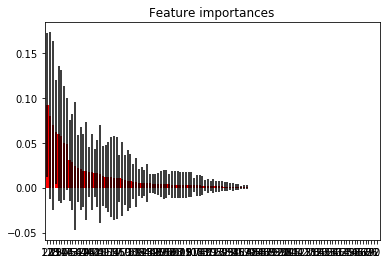

In [33]:
import matplotlib.pyplot as plt
importances = model1.feature_importances_
std = np.std([tree.feature_importances_ for tree in model1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

TypeError: 'FrozenList' object is not callable